In [67]:
from time import time
import matplotlib.pyplot as plt 
def time_get(map, key, step):
    start_time = time()
    for i in range(step):
        map[key * i]
    end_time = time()
    return (end_time - start_time) * 1e6
def time_put(map, key, val, step):
    start_time = time()
    for i in range(step):
        map[key * i] = val 
    end_time = time() 
    return (end_time - start_time) * 1e6

2024-09-16 15:38:48,358 - INFO - Hash map: Average put time = 0.061056 µs
2024-09-16 15:38:49,079 - INFO - Tree map: Average put time = 0.459714 µs
2024-09-16 15:38:49,194 - INFO - Hash map: Average access time = 0.036283 µs
2024-09-16 15:38:49,336 - INFO - Tree map: Average access time = 0.053172 µs


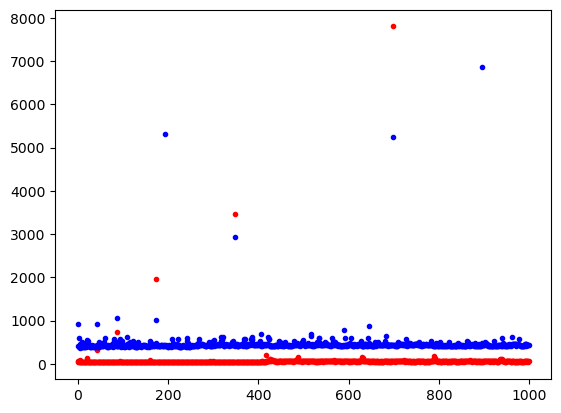

In [145]:
import sortedcollections
import logging
from sortedcollections import SortedDict as treemap
# Initialize logging
logging.basicConfig(
    level=logging.INFO, 
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler()]
)

N = 1000000
STEP = 1000
hash_map = {};
tree_map = treemap();

times_put_hash = [0 for _ in range(round(N/STEP))];
for i in range(round(N / STEP)):
    times_put_hash[i] = time_put(hash_map, i, "VAL", STEP)
    
hash_avg_put_time = sum(times_put_hash) / N
logging.info(f"Hash map: Average put time = {hash_avg_put_time:.6f} µs")

times_put_tree = [0 for _ in range(round(N/STEP))];
for i in range(round(N / STEP)):
    times_put_tree[i] = time_put(tree_map, i, "VAL", STEP)
    
tree_avg_put_time = sum(times_put_tree) / N
logging.info(f"Tree map: Average put time = {tree_avg_put_time:.6f} µs")
    

times_get_hash = [0 for _ in range(round(N/STEP))]
for i in range(round(N / STEP)):
    times_get_hash[i] = time_get(hash_map, i, STEP);

hash_avg_time = sum(times_get_hash) / N
logging.info(f"Hash map: Average access time = {hash_avg_time:.6f} µs")

times_get_tree = [0 for _ in range(round(N/STEP))]
for i in range(round(N / STEP)):
    times_get_tree[i] = time_get(tree_map, i, STEP)
    
tree_avg_time = sum(times_get_tree) / N

logging.info(f"Tree map: Average access time = {tree_avg_time:.6f} µs")

plt.figure()
plt.plot(times_put_hash, '.r')
plt.plot(times_put_tree, '.b')
plt.show()


In [ ]:
import time
import logging
from sortedcollections import SortedDict

# Initialize logging
logging.basicConfig(
    level=logging.INFO, 
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[logging.StreamHandler()]
)

N = 10000000
steps = [0 for _ in range(0, 1000, +100)]  # List of dynamic step sizes

# Initialize hash map and tree map
hash_map = {}
tree_map = SortedDict()

# Function to time the put operation
def time_put(map_structure, start_idx, value, step):
    start = time.time()
    for i in range(start_idx * step, (start_idx + 1) * step):
        map_structure[i] = value
    end = time.time()
    return (end - start) * 1e6  # Convert to microseconds

# Function to time the get operation
def time_get(map_structure, start_idx, step):
    start = time.time()
    for i in range(start_idx * step, (start_idx + 1) * step):
        _ = map_structure[i]
    end = time.time()
    return (end - start) * 1e6  # Convert to microseconds

# Iterate over dynamic steps
print(steps)
times_put_hash_step = [1 for _ in range(len(steps))]
times_put_tree_step = [1 for _ in range(len(steps))]
for i in range(len(steps)):
    STEP = steps[i];
    logging.info(f"Measuring performance with step size = {STEP}")

    start_put_hash_step = time.time()
    # Measure put times for hash_map
    times_put_hash = [0 for _ in range(round(N / STEP))]
    for j in range(round(N / STEP)):
        times_put_hash[j] = time_put(hash_map, j, "VAL", STEP)
    end_put_hash_step = time.time()
    
    # hash_avg_put_time = sum(times_put_hash) / len(times_put_hash)
    # logging.info(f"Hash map (Step {STEP}): Average put time = {hash_avg_put_time:.6f} µs")

    times_put_hash_step[i] = end_put_hash_step - start_put_hash_step

    # Measure put times for tree_map
    start_put_tree_step = time.time()
    times_put_tree = [0 for _ in range(round(N / STEP))]
    for k in range(round(N / STEP)):
        times_put_tree[k] = time_put(tree_map, k, "VAL", STEP)
    
    tree_avg_put_time = sum(times_put_tree) / len(times_put_tree)
    logging.info(f"Tree map (Step {STEP}): Average put time = {tree_avg_put_time:.6f} µs")
    end_put_tree_step = time.time()

    times_put_tree_step[i] = end_put_tree_step - start_put_tree_step

    # Measure get times for hash_map
    # times_get_hash = [0 for _ in range(round(N / STEP))]
    # for p in range(round(N / STEP)):
    #     times_get_hash[p] = time_get(hash_map, p, STEP)
    
    # hash_avg_get_time = sum(times_get_hash) / len(times_get_hash)
    # logging.info(f"Hash map (Step {STEP}): Average get time = {hash_avg_get_time:.6f} µs")

    # # Measure get times for tree_map
    # times_get_tree = [0 for _ in range(round(N / STEP))]
    # for l in range(round(N / STEP)):
    #     times_get_tree[l] = time_get(tree_map, i, STEP)
    
    # tree_avg_get_time = sum(times_get_tree) / len(times_get_tree)
    # logging.info(f"Tree map (Step {STEP}): Average get time = {tree_avg_get_time:.6f} µs")

# Optionally plot the times (if needed for analysis)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(times_put_hash_step, '.r', label="HashMap Put")
plt.plot(times_put_tree_step, '.b', label="TreeMap Put")
plt.xlabel("Iteration")
plt.ylabel("Time (µs)")
plt.legend()
plt.show()